### <i> Detecting Cryptocurrency Scams in the USA A Machine Learning-Based Analysis of Scam Patterns </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/zongaobian/cryptocurrency-scam-dataset </i>
### <i> Load The Dataset </i>

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### <i> Load The Dataset </i>

In [4]:
df = pd.read_csv("urls.csv")
df

,name,url,category,subcategory,description,addresses,reporter
0,xn--myetherwallt-leb.com,http://xn--myetherwallt-leb.com,Phishing,MyEtherWallet,Google reports site as insecure,NaN,CryptoScamDB
1,myelherwallel.com,http://myelherwallel.com,Phishing,MyEtherWallet,NaN,{'ETH': ['0xD0cC2B24980CBCCA47EF755Da88B220a82...,CryptoScamDB
2,myetherwallet.cam,http://myetherwallet.cam,Phishing,MyEtherWallet,redirecting to real site but that happened before,NaN,CryptoScamDB
3,coindash.ru,http://coindash.ru,Phishing,Coindash,someone plz check,NaN,CryptoScamDB
4,coin-wallet.info,http://coin-wallet.info,Phishing,Coindash,scam wallet,NaN,CryptoScamDB
...,...,...,...,...,...,...,...
9884,etherscan-approve.negle-universet.dk,https://etherscan-approve.negle-universet.dk,Phishing,Etherscan,Fake Etherscan site phishing for secrets with ...,NaN,CryptoScamDB
9885,coolmansuniversebabies.com,https://coolmansuniversebabies.com,Phishing,Coolmansuniverse,Fake Coolmansuniverse site phishing for funds,{'ETH': ['0x4eba1ce155f9dc95d70e5ab2a94898b4f2...,CryptoScamDB
9886,usdtpos.net,https://usdtpos.net,Scamming,Investment,Fake investment platform phishing for funds - ...,{'ETH': ['0x726f8c502b37c05cb08642f6350ee8a94e...,CryptoScamDB
9887,eth-radar.com,https://eth-radar.com,Phishing,Yearn,Fake YearnFinance site phishing for funds,{'ETH': ['0xb6af46be91b1ba4043c99f968c18871d3a...,CryptoScamDB


### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         9889 non-null   object
 1   url          9889 non-null   object
 2   category     9889 non-null   object
 3   subcategory  9876 non-null   object
 4   description  8011 non-null   object
 5   addresses    4332 non-null   object
 6   reporter     9886 non-null   object
dtypes: object(7)
memory usage: 540.9+ KB


In [7]:
df.describe()

,name,url,category,subcategory,description,addresses,reporter
count,9889,9889,9889,9876,8011,4332,9886
unique,9824,9848,4,524,2486,3515,2
top,etoro.zone,https://dock.so,Phishing,Trust-Trading,Trust trading scam site,{'ETH': ['0xc4856c6C04Ee3416dAEaeD3E5abAE3622B...,CryptoScamDB
freq,2,2,5946,3398,2676,26,9863


### <i> Data Preprocessing </i>

In [9]:
import pandas as pd
import numpy as np
import re


# Basic Overview of the Dataset
print("Initial Dataset Info:\n")
print(df.info())
print("\nInitial Missing Values:\n")
print(df.isnull().sum())

# Step 1: Handling Missing Values
# Fill missing values in 'subcategory' with 'Unknown'
df['subcategory'] = df['subcategory'].fillna('Unknown')

# Fill missing values in 'description' with an empty string
df['description'] = df['description'].fillna('')

# Create a binary column indicating if 'addresses' is missing or not
df['has_address'] = df['addresses'].notnull().astype(int)

# Drop rows with missing 'name' or 'url' as they are critical
# (This decision can be modified based on requirements)
df = df.dropna(subset=['name', 'url'])

# Step 2: Cleaning Textual Data
# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

# Apply text cleaning to relevant columns
df['name'] = df['name'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)

# Step 3: Extract Features from 'url'
# Extract domain from URLs
def extract_domain(url):
    match = re.search(r'://(www\.)?(.*?)/', url + '/')
    return match.group(2) if match else 'unknown'

df['domain'] = df['url'].apply(extract_domain)

# Step 4: Encoding Categorical Columns
# Encode 'category' and 'subcategory'
df['category_encoded'] = pd.factorize(df['category'])[0]
df['subcategory_encoded'] = pd.factorize(df['subcategory'])[0]


# Final Check
print("\nProcessed Dataset Info:\n")
print(df.info())
print("\nSample of Processed Data:\n")
print(df.head())


Initial Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         9889 non-null   object
 1   url          9889 non-null   object
 2   category     9889 non-null   object
 3   subcategory  9876 non-null   object
 4   description  8011 non-null   object
 5   addresses    4332 non-null   object
 6   reporter     9886 non-null   object
dtypes: object(7)
memory usage: 540.9+ KB
None

Initial Missing Values:

name              0
url               0
category          0
subcategory      13
description    1878
addresses      5557
reporter          3
dtype: int64

Processed Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 9889 non-null   obj

### <i> Expolatory Data Analysis And Visulization </i> 

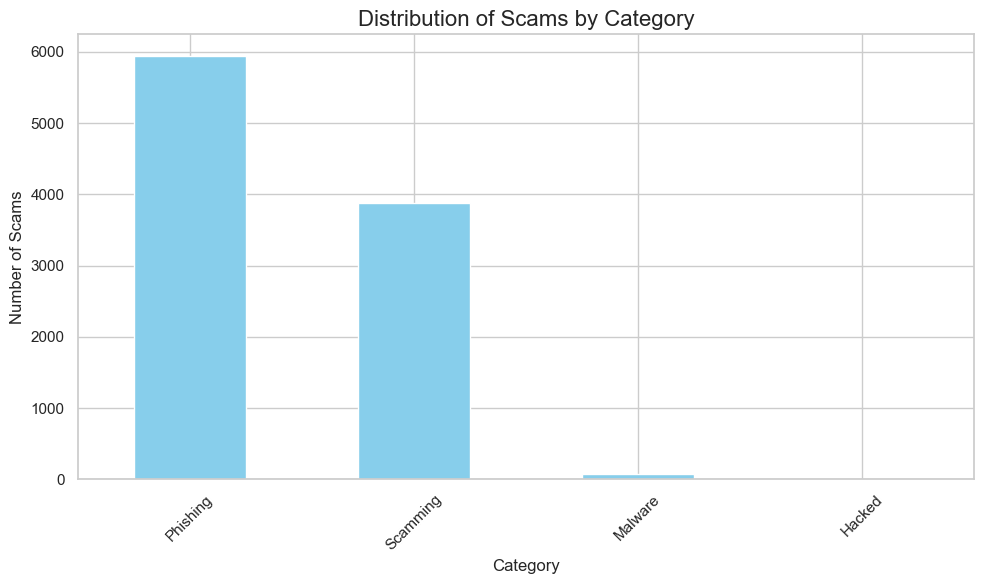

In [11]:
import re
import matplotlib.pyplot as plt


# Visualization Setup
sns.set(style="whitegrid")

# 1. Distribution of Scams by Category
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Scams by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Scams', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


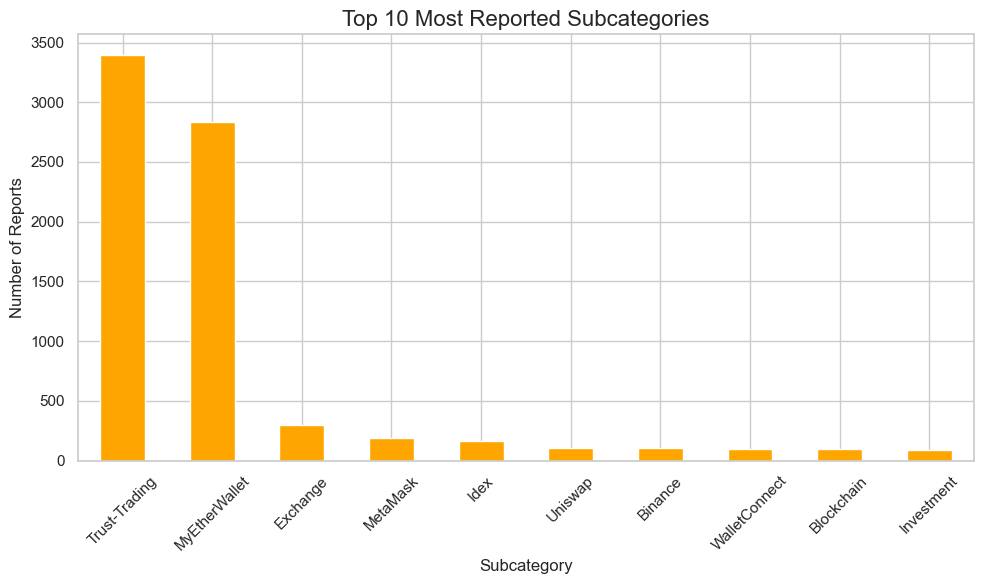

In [12]:
# 2. Top 10 Most Reported Subcategories
plt.figure(figsize=(10, 6))
df['subcategory'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Reported Subcategories', fontsize=16)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

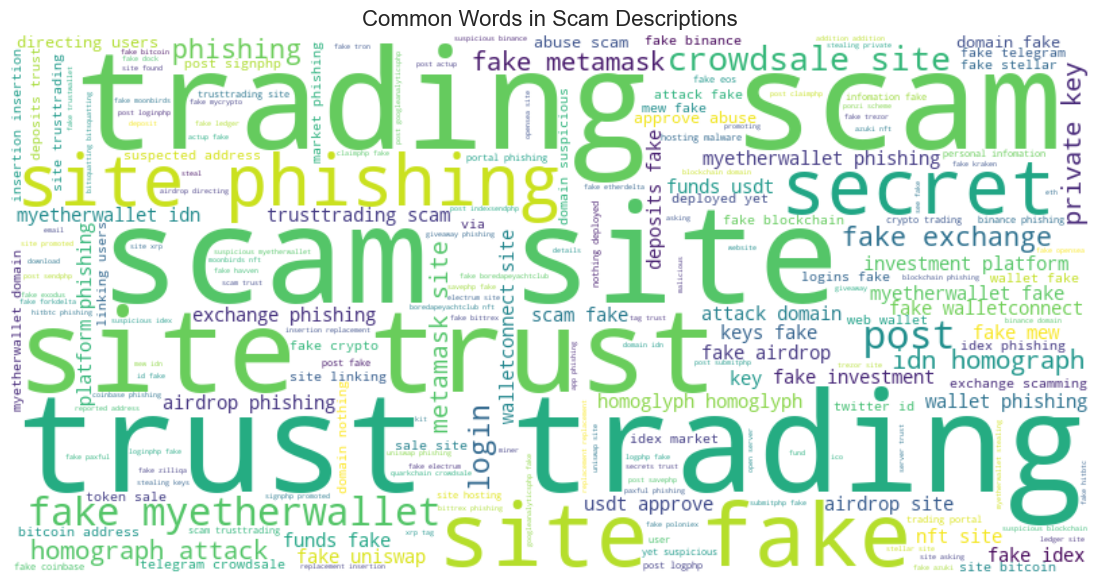

In [13]:
!pip install wordcloud
# 3. Analysis of Scam Descriptions (Word Cloud)
from wordcloud import WordCloud

text = " ".join(description for description in df['description'] if isinstance(description, str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Common Words in Scam Descriptions', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

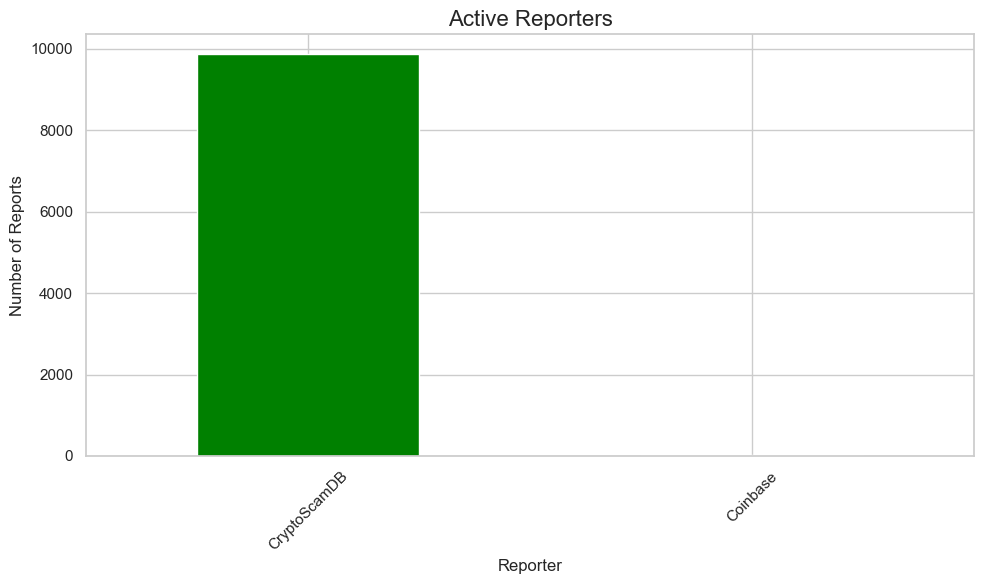

In [14]:
# 4. Number of Scams by Reporter
plt.figure(figsize=(10, 6))
df['reporter'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Active Reporters', fontsize=16)
plt.xlabel('Reporter', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


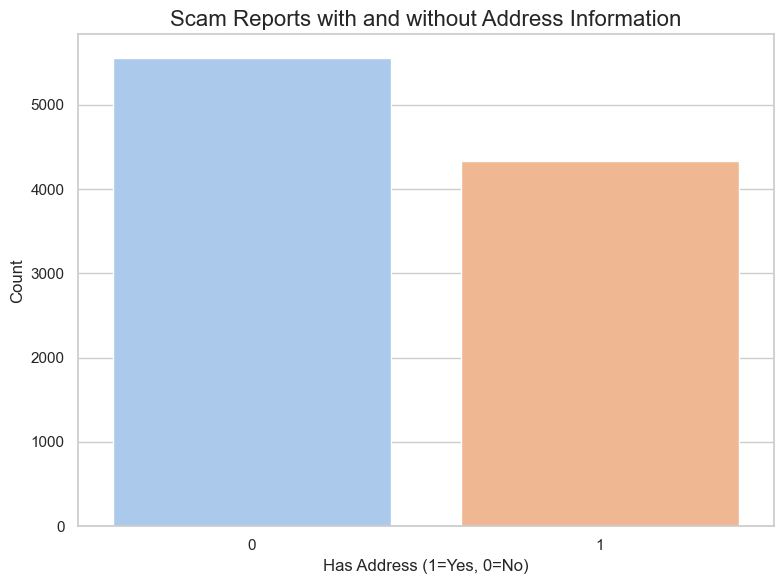

In [15]:
# 5. Presence of Address in Scam Reports
plt.figure(figsize=(8, 6))
sns.countplot(x='has_address', data=df, palette='pastel')
plt.title('Scam Reports with and without Address Information', fontsize=16)
plt.xlabel('Has Address (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


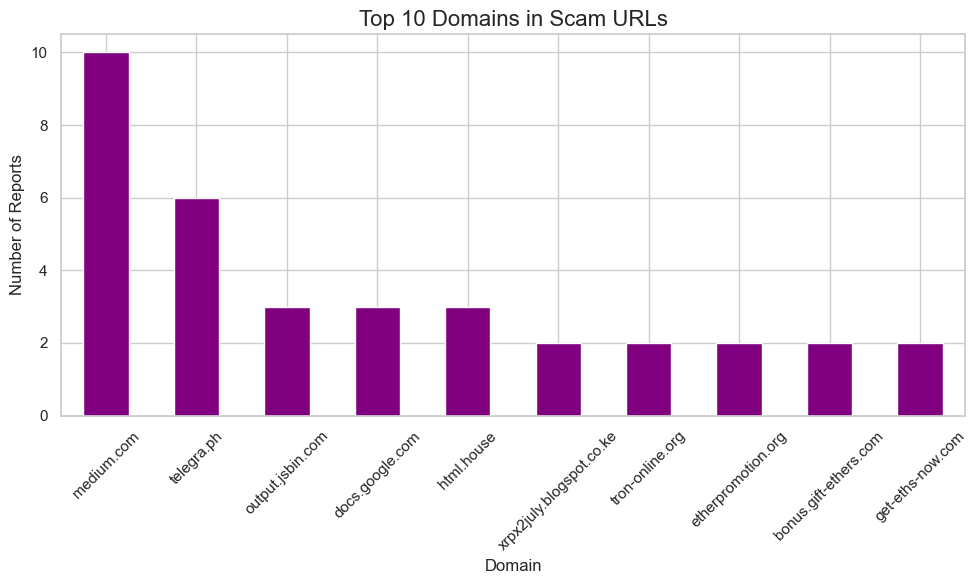

In [16]:
# 6. Top 10 Domains in Scam URLs
plt.figure(figsize=(10, 6))
df['domain'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Domains in Scam URLs', fontsize=16)
plt.xlabel('Domain', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

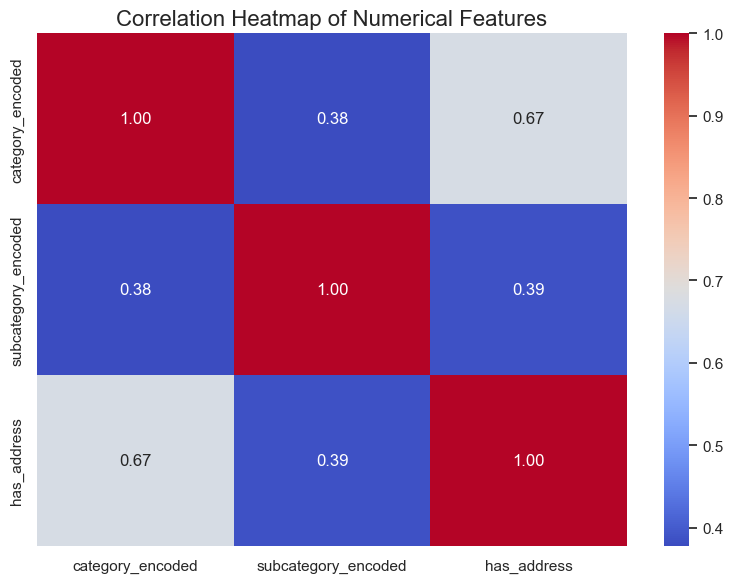

In [17]:
# 7. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(8, 6))
numerical_columns = ['category_encoded', 'subcategory_encoded', 'has_address']
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


### <i> Modeling </i>
### <i> Random Forest Classifier </i>

In [19]:
# Handle missing values
# Fill missing numerical values with 0
numerical_columns = ['category_encoded', 'subcategory_encoded', 'has_address']
df[numerical_columns] = df[numerical_columns].fillna(0)

# Drop rows with missing target values
df = df.dropna(subset=['reporter'])  # Replace 'label' with the actual target column

# Prepare data for modeling
X = df[['category_encoded', 'subcategory_encoded', 'has_address']]
y = df['reporter']  # Replace 'label' with the actual target column

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier:

              precision    recall  f1-score   support

    Coinbase       1.00      1.00      1.00      1977
CryptoScamDB       1.00      1.00      1.00      1969

    accuracy                           1.00      3946
   macro avg       1.00      1.00      1.00      3946
weighted avg       1.00      1.00      1.00      3946

Confusion Matrix:
 [[1977    0]
 [   6 1963]]
Accuracy: 0.9984794728839331


### <i> Logistic Regression </i>

In [21]:
# Model 2: Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_lr = log_reg_model.predict(X_test)
print("\nLogistic Regression:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression:

              precision    recall  f1-score   support

    Coinbase       0.85      1.00      0.92      1977
CryptoScamDB       1.00      0.82      0.90      1969

    accuracy                           0.91      3946
   macro avg       0.92      0.91      0.91      3946
weighted avg       0.92      0.91      0.91      3946

Confusion Matrix:
 [[1977    0]
 [ 359 1610]]
Accuracy: 0.9090217942219969


### <i> Multinomial Naive Bayes </i>

In [23]:
# Model 3: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("\nMultinomial Naive Bayes:\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Multinomial Naive Bayes:

              precision    recall  f1-score   support

    Coinbase       0.77      1.00      0.87      1977
CryptoScamDB       1.00      0.70      0.83      1969

    accuracy                           0.85      3946
   macro avg       0.89      0.85      0.85      3946
weighted avg       0.89      0.85      0.85      3946

Confusion Matrix:
 [[1977    0]
 [ 583 1386]]
Accuracy: 0.8522554485554993


### <i> Comparison Of All Models </i>

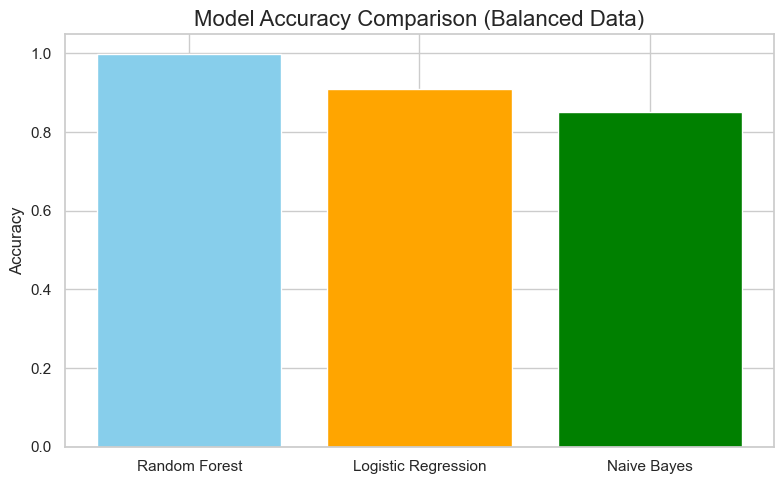

In [25]:
# Visualize model performance
models = ['Random Forest', 'Logistic Regression', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_nb)
]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.title('Model Accuracy Comparison (Balanced Data)', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.tight_layout()
plt.show()
